15.03.2024
## Głębokie uczenie

# 1. Problem klasyfikacji wieloklasowej z wykorzystaniem Kerasa


# Multi-class classification problem

In the previous exercise, you have classified vector inputs into two mutually exclusive classes using a densely-connected neural network. But what happens when you have more than two classes?

Now, you will build a network to classify Reuters newswires into 46 different mutually-exclusive topics. Since we have many classes, this problem is an instance of “multi-class classification”, and since each data point should be classified into only one category, the problem is more specifically an instance of “single-label, the multi-class classification”. If each data point could have belonged to multiple categories (in our case, topics) then we would be facing a “multi-label, multi-class classification” problem.

**The Reuters dataset**

The Reuters dataset is a set of short newswires and their topics, published by Reuters in 1986. It's a very simple, widely used toy dataset for text classification. There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set. Like IMDB and MNIST, the Reuters dataset comes packaged as part of Keras.



In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


**Preparing the data**

Please vectorize the data with the exact same code as in our previous ex.

In [ ]:
# TO DO: Vectorize the data as before -> done
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Then vectorize the labels using “one-hot” encoding. One-hot encoding is a widely used format for categorical data, also called “categorical encoding”. In our case, one-hot encoding of our labels consists in embedding each label as an all-zero vector (dimension=46) with a 1 in the place of the label index. There is a built-in way to do this in Keras:

In [ ]:
# TO DO: Convert labels to categorical format -> done
from keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

Network architecture

In this example we have a new constraint: the number of output classes has gone from 2 to 46, i.e. the dimensionality of the output space is much larger. In our previous example, we were using 16-dimensional intermediate layers, but a 16-dimensional space may be too limited to learn to separate 46 different classes: such small layers may act as information bottlenecks, permanently dropping relevant information. In this exercise please use 64 units to build the DNN.

Network architecture:

1. two intermediate layers with 64 hidden units each, and an activation function relu
2. third Dense layer of size 46 which will end the network. This means that for each input sample, our network will output a 46-dimensional vector.
3. The last layer uses a softmax activation. It means that the network will output a probability distribution over the 46 different output classes, i.e. for every input sample, the network will produce a 46-dimensional output vector where output[i] is the probability that the sample belongs to class i. The 46 scores will sum to 1.


In [ ]:
#TODO: Implement the architecture -> done
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(46, activation = 'softmax'))

Network training

Since we are facing a multi-class classification problem the best loss function to use in this case is categorical_crossentropy. It measures the distance between two probability distributions: in our case, between the probability distribution output by our network, and the true distribution of the labels. By minimizing the distance between these two distributions, we train our network to output something as close as possible to the true labels.

Parameters:
1. rmsprop optimizer
2. categorical_crossentropy loss function
3. accuracy metric


In [ ]:
#TODO: Compile the model -> done
network.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

**Validation**

Like in the previous ex. divide the training dataset into a 'validation set' by setting apart 20% samples.

For our example parameters (epochs = 20 and batch_size = 512) the network should achieve acc: 0.95 and val_acc: 0.80.

Display its loss and accuracy curves on a plot.

Epoch 1/20
15/15 [==============================] - 2s 85ms/step - loss: 2.9203 - accuracy: 0.4164 - val_loss: 2.0535 - val_accuracy: 0.6177
Epoch 2/20
15/15 [==============================] - 1s 74ms/step - loss: 1.6245 - accuracy: 0.6778 - val_loss: 1.5376 - val_accuracy: 0.6739
Epoch 3/20
15/15 [==============================] - 1s 101ms/step - loss: 1.2249 - accuracy: 0.7365 - val_loss: 1.3668 - val_accuracy: 0.6928
Epoch 4/20
15/15 [==============================] - 1s 100ms/step - loss: 1.0085 - accuracy: 0.7850 - val_loss: 1.2059 - val_accuracy: 0.7524
Epoch 5/20
15/15 [==============================] - 2s 131ms/step - loss: 0.8433 - accuracy: 0.8228 - val_loss: 1.1645 - val_accuracy: 0.7513
Epoch 6/20
15/15 [==============================] - 3s 172ms/step - loss: 0.7106 - accuracy: 0.8509 - val_loss: 1.2302 - val_accuracy: 0.7112
Epoch 7/20
15/15 [==============================] - 3s 176ms/step - loss: 0.6133 - accuracy: 0.8729 - val_loss: 1.0413 - val_accuracy: 0.7780
Epoch 8/

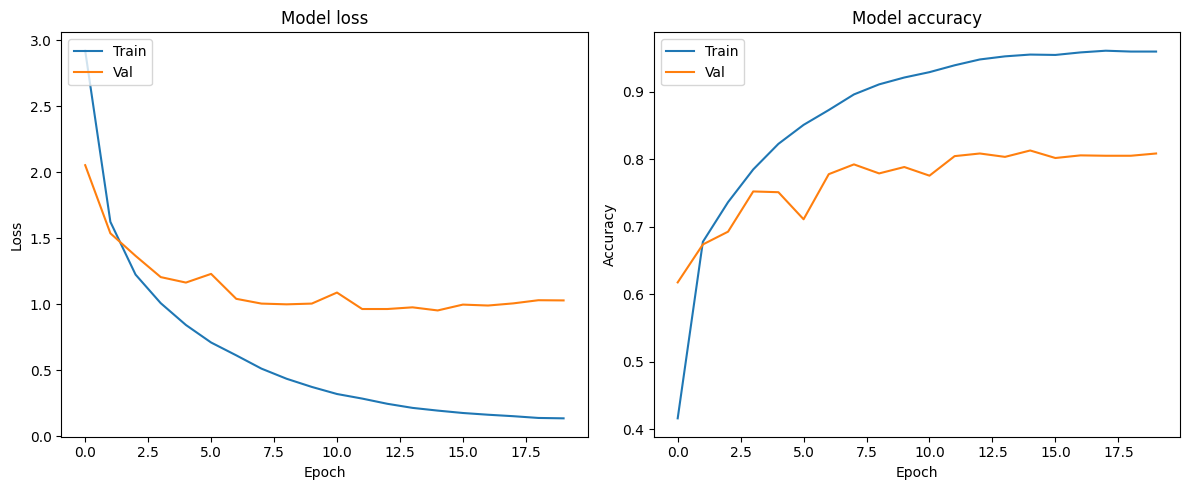

In [ ]:
#TODO: Divide the model into train and validation dataset -> done
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

#TODO: Train the model -> done
history = network.fit(x_train, y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

#TODO: Plot the results -> done
history_dict = history.history

def plot_history(history_dict):
  training_loss = history_dict['loss']
  validation_loss = history_dict['val_loss']

  training_accuracy = history_dict['accuracy']
  validation_accuracy = history_dict['val_accuracy']

  plt.figure(figsize = (12, 5))

  plt.subplot(1, 2, 1)
  plt.plot(training_loss)
  plt.plot(validation_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')

  plt.subplot(1, 2, 2)
  plt.plot(training_accuracy)
  plt.plot(validation_accuracy)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')

  plt.tight_layout()
  plt.show()

plot_history(history_dict)

**Task 1:** Analyse the plots. What happens after the 8-th epoch? Train a new network for only 8 epochs. What can you say about the outcome ?  
**Answer:** On both training and validation data loss is decreasing and accuracy is increasing but changes are starting to be not that drastic.
After training the model for 8 epochs we can see that training data's loss and accuracy is close to constant (not learning much) but we can see flunctuations when it comes to validation data. It means that the model predicts quite well only up to a point and it works better on training data, so on data which was already seen.

**Task 2:** Is a large intermediate layer necessary? Train a network with only 4-dimensional intermediate layer.  
**Answer:** It is necessary to train model with large intermediate layer so it makes better predictions for new data (achieving lower loss and greater accuracy with next epochs).

**Task 3:** Experiment with different parameters and functions you learned in a lecture last week. You can change activation functions, optimizer or the number of neurons and layers. Train the network three times, with three different sets of parameters and discuss the results.  
**Answer:**  
**#1:** Added extra layer with the same number of hidden units, changed optimizer to 'adam', number of epochs were decreased to 12 and batch size to 640.  
**->** The loss and accuracy of validation data is lower than training data, the changes are smaller after 2nd epoch and there is a huge loss for validation data and decent accuracy of a model. Prediction on unseen validation data is not as good as for training data but it looks like it generalizes quite well for unseen data.  

**#2:** The second intermediate layer's hidden units were increased to 128, activation function was changed to 'tanh', optimizer was changed to 'adadelta' and number of epochs were increased to 30.  
**->** Model on both training and validation data acts similiarly in a linear fashion, but loss for validation data is higher and accuracy changes from more accurate compared to training data to less, but overall loss is very high and accuracy very low. Model looks to be underfitting and there might be incorrect model architecture and its insufficient training - model is not learning much.  

**#3:** Added two extra intermediate layers with the same number of hidden units, changed activation function to 'selu', optimizer to 'adagrad', number of epochs were increased to 25 and batch size decreased to 150.  
**->** Model on both training and validation data acts similiarly where up to a point for both loss and accuracy there is a huge change (decreasing loss and increasing accuracy) with the worse performance for validation data and overall loss is quite high but with decent accuracy. It can mean that model is generalizing well to unseen data but model might be to simple and be underfitting (higher loss value).  



**Saving trained model**
Sometimes there is a need to save your model and returning to it later. You can save an entire model to a single file. It will include:


*   the model's architecture/config,
*   the model's weight values (which were learned during training),
*   the model's compilation information (if compile()) was called,
*   the optimizer and its state, if any (this enables you to restart training where you left).

A model can be saved in default TensorFlow format or in specific to Keras h5 format:

In [ ]:
#Saving a model into a .h5 file
# model.save('my_model.h5')
network.save('my_model.h5')

#Loading a model from file
# reconstructed_model = keras.models.load_model("my_model.h5")
reconstructed_model = models.load_model("my_model.h5")

Epoch 1/8
15/15 [==============================] - 1s 82ms/step - loss: 0.1232 - accuracy: 0.9617 - val_loss: 1.1366 - val_accuracy: 0.7863
Epoch 2/8
15/15 [==============================] - 1s 60ms/step - loss: 0.1208 - accuracy: 0.9596 - val_loss: 1.0328 - val_accuracy: 0.8091
Epoch 3/8
15/15 [==============================] - 1s 70ms/step - loss: 0.1165 - accuracy: 0.9619 - val_loss: 1.1180 - val_accuracy: 0.7885
Epoch 4/8
15/15 [==============================] - 2s 122ms/step - loss: 0.1111 - accuracy: 0.9623 - val_loss: 1.0447 - val_accuracy: 0.8091
Epoch 5/8
15/15 [==============================] - 1s 88ms/step - loss: 0.1090 - accuracy: 0.9628 - val_loss: 1.1226 - val_accuracy: 0.8058
Epoch 6/8
15/15 [==============================] - 1s 57ms/step - loss: 0.1063 - accuracy: 0.9608 - val_loss: 1.2831 - val_accuracy: 0.7741
Epoch 7/8
15/15 [==============================] - 1s 52ms/step - loss: 0.1080 - accuracy: 0.9635 - val_loss: 1.1698 - val_accuracy: 0.7919
Epoch 8/8
15/15 [==

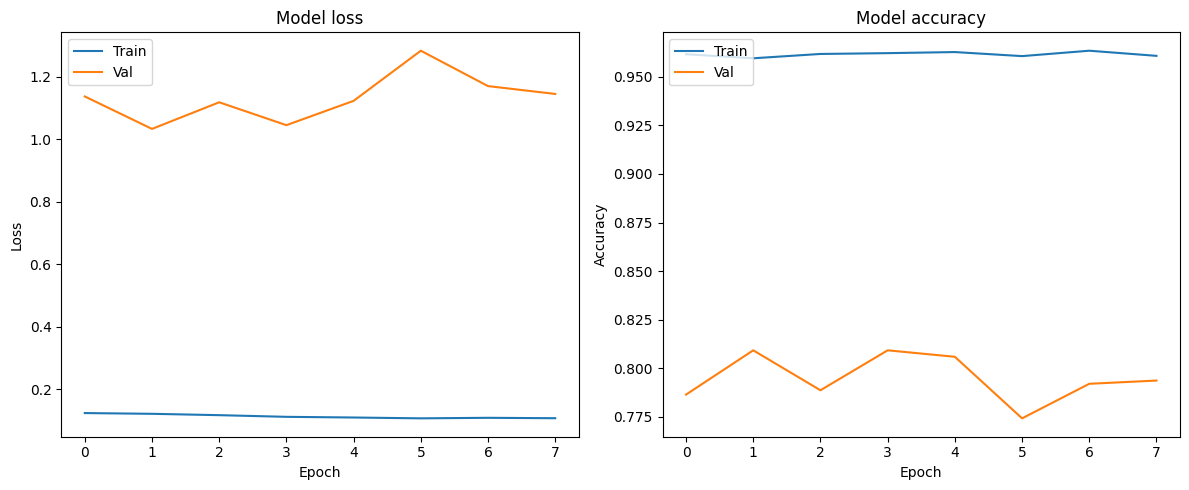

In [ ]:
# Task 1: network trained for 8 epochs
history_8_epochs = network.fit(x_train, y_train, epochs = 8, batch_size = 512, validation_data = (x_val, y_val))

history_dict_8_epochs = history_8_epochs.history
plot_history(history_dict_8_epochs)

Epoch 1/20
15/15 [==============================] - 1s 70ms/step - loss: 0.1034 - accuracy: 0.9619 - val_loss: 1.1254 - val_accuracy: 0.8024
Epoch 2/20
15/15 [==============================] - 1s 62ms/step - loss: 0.1008 - accuracy: 0.9628 - val_loss: 1.1008 - val_accuracy: 0.8036
Epoch 3/20
15/15 [==============================] - 1s 55ms/step - loss: 0.1021 - accuracy: 0.9624 - val_loss: 1.1184 - val_accuracy: 0.8052
Epoch 4/20
15/15 [==============================] - 1s 56ms/step - loss: 0.0963 - accuracy: 0.9628 - val_loss: 1.0919 - val_accuracy: 0.8091
Epoch 5/20
15/15 [==============================] - 1s 60ms/step - loss: 0.0968 - accuracy: 0.9620 - val_loss: 1.1351 - val_accuracy: 0.8052
Epoch 6/20
15/15 [==============================] - 1s 86ms/step - loss: 0.0925 - accuracy: 0.9638 - val_loss: 1.1157 - val_accuracy: 0.8019
Epoch 7/20
15/15 [==============================] - 1s 101ms/step - loss: 0.0935 - accuracy: 0.9635 - val_loss: 1.1014 - val_accuracy: 0.8114
Epoch 8/20
1

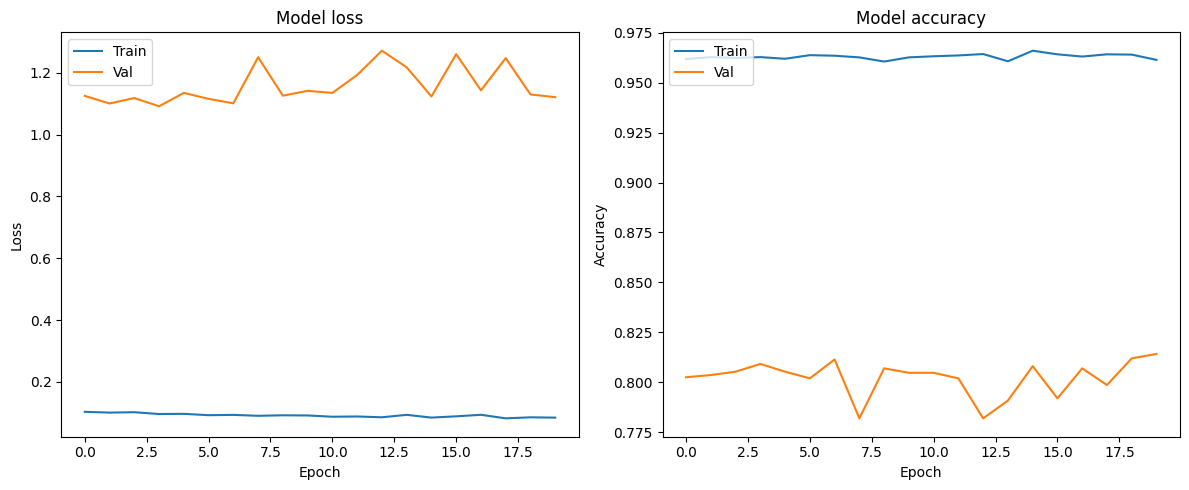

In [ ]:
# Task 2: network trained with a single 4-dimensional intermediate layer
network_4d = models.Sequential()
network_4d.add(layers.Dense(64, activation = 'relu'))
network_4d.add(layers.Dense(4, activation = 'relu'))
network_4d.add(layers.Dense(46, activation = 'softmax'))

history_4d = network.fit(x_train, y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

history_dict_4d = history_4d.history
plot_history(history_dict_4d)

Epoch 1/12
12/12 [==============================] - 2s 115ms/step - loss: 3.6650 - accuracy: 0.2344 - val_loss: 3.2401 - val_accuracy: 0.3996
Epoch 2/12
12/12 [==============================] - 1s 83ms/step - loss: 2.7184 - accuracy: 0.4512 - val_loss: 2.2226 - val_accuracy: 0.5559
Epoch 3/12
12/12 [==============================] - 1s 108ms/step - loss: 1.7656 - accuracy: 0.6578 - val_loss: 1.6531 - val_accuracy: 0.6800
Epoch 4/12
12/12 [==============================] - 1s 102ms/step - loss: 1.3002 - accuracy: 0.7246 - val_loss: 1.4283 - val_accuracy: 0.7067
Epoch 5/12
12/12 [==============================] - 1s 68ms/step - loss: 1.0519 - accuracy: 0.7648 - val_loss: 1.2773 - val_accuracy: 0.7290
Epoch 6/12
12/12 [==============================] - 1s 73ms/step - loss: 0.8528 - accuracy: 0.8079 - val_loss: 1.1960 - val_accuracy: 0.7535
Epoch 7/12
12/12 [==============================] - 1s 70ms/step - loss: 0.6905 - accuracy: 0.8497 - val_loss: 1.1387 - val_accuracy: 0.7652
Epoch 8/12

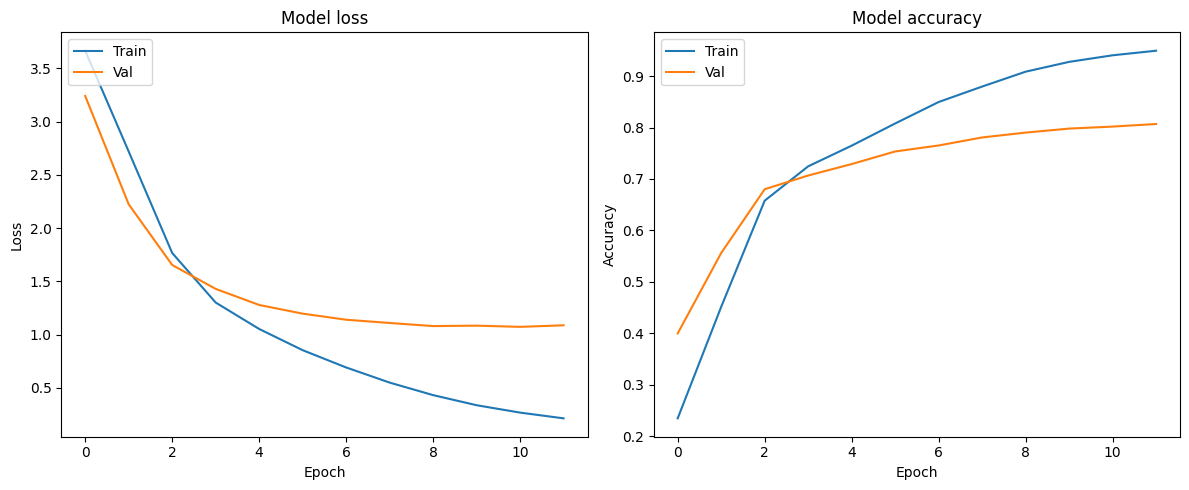

Epoch 1/30
15/15 [==============================] - 2s 94ms/step - loss: 3.8211 - accuracy: 0.0295 - val_loss: 3.8224 - val_accuracy: 0.0373
Epoch 2/30
15/15 [==============================] - 1s 97ms/step - loss: 3.8174 - accuracy: 0.0324 - val_loss: 3.8190 - val_accuracy: 0.0406
Epoch 3/30
15/15 [==============================] - 1s 91ms/step - loss: 3.8137 - accuracy: 0.0365 - val_loss: 3.8156 - val_accuracy: 0.0445
Epoch 4/30
15/15 [==============================] - 1s 64ms/step - loss: 3.8101 - accuracy: 0.0408 - val_loss: 3.8122 - val_accuracy: 0.0473
Epoch 5/30
15/15 [==============================] - 1s 97ms/step - loss: 3.8065 - accuracy: 0.0466 - val_loss: 3.8088 - val_accuracy: 0.0529
Epoch 6/30
15/15 [==============================] - 1s 63ms/step - loss: 3.8029 - accuracy: 0.0516 - val_loss: 3.8054 - val_accuracy: 0.0568
Epoch 7/30
15/15 [==============================] - 1s 65ms/step - loss: 3.7993 - accuracy: 0.0557 - val_loss: 3.8020 - val_accuracy: 0.0601
Epoch 8/30
15

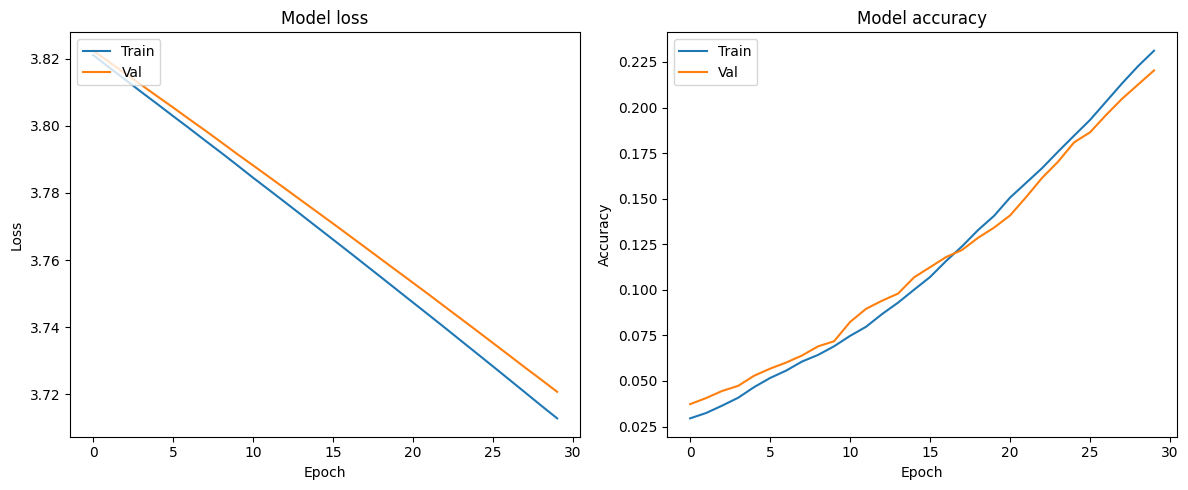

Epoch 1/25
48/48 [==============================] - 2s 30ms/step - loss: 3.2150 - accuracy: 0.3378 - val_loss: 2.7524 - val_accuracy: 0.4285
Epoch 2/25
48/48 [==============================] - 1s 22ms/step - loss: 2.4833 - accuracy: 0.4802 - val_loss: 2.3572 - val_accuracy: 0.4897
Epoch 3/25
48/48 [==============================] - 1s 23ms/step - loss: 2.1883 - accuracy: 0.5207 - val_loss: 2.1540 - val_accuracy: 0.5147
Epoch 4/25
48/48 [==============================] - 1s 22ms/step - loss: 2.0171 - accuracy: 0.5427 - val_loss: 2.0242 - val_accuracy: 0.5331
Epoch 5/25
48/48 [==============================] - 2s 31ms/step - loss: 1.8979 - accuracy: 0.5635 - val_loss: 1.9294 - val_accuracy: 0.5543
Epoch 6/25
48/48 [==============================] - 2s 38ms/step - loss: 1.8073 - accuracy: 0.5866 - val_loss: 1.8567 - val_accuracy: 0.5776
Epoch 7/25
48/48 [==============================] - 1s 21ms/step - loss: 1.7351 - accuracy: 0.6038 - val_loss: 1.7988 - val_accuracy: 0.5904
Epoch 8/25
48

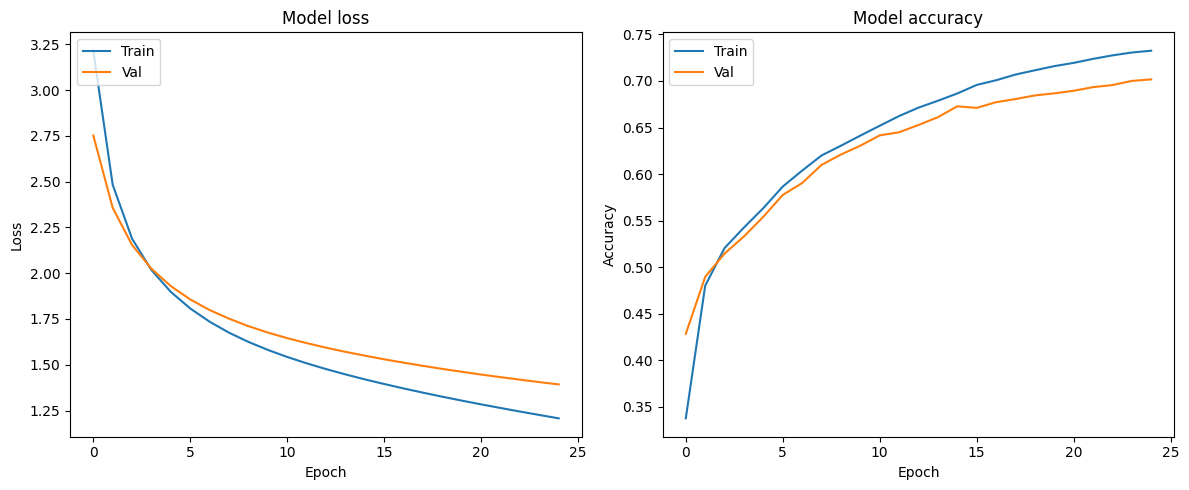

In [ ]:
# Task 3
# 1
network1 = models.Sequential()
network1.add(layers.Dense(64, activation = 'relu'))
network1.add(layers.Dense(64, activation = 'relu'))
network1.add(layers.Dense(64, activation = 'relu'))
network1.add(layers.Dense(46, activation = 'softmax'))

network1.compile(optimizer = 'adam',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

history1 = network1.fit(x_train, y_train, epochs = 12, batch_size = 640, validation_data = (x_val, y_val))

history1_dict = history1.history
print('--- 1 ---')
plot_history(history1_dict)

# 2
network2 = models.Sequential()
network2.add(layers.Dense(64, activation = 'tanh'))
network2.add(layers.Dense(128, activation = 'tanh'))
network2.add(layers.Dense(46, activation = 'softmax'))

network2.compile(optimizer = 'adadelta',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

history2 = network2.fit(x_train, y_train, epochs = 30, batch_size = 512, validation_data = (x_val, y_val))

history2_dict = history2.history
print('--- 2 ---')
plot_history(history2_dict)

# 3
network3 = models.Sequential()
network3.add(layers.Dense(64, activation = 'selu'))
network3.add(layers.Dense(64, activation = 'selu'))
network3.add(layers.Dense(64, activation = 'selu'))
network3.add(layers.Dense(64, activation = 'selu'))
network3.add(layers.Dense(46, activation = 'softmax'))

network3.compile(optimizer = 'adagrad',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

history3 = network3.fit(x_train, y_train, epochs = 25, batch_size = 150, validation_data = (x_val, y_val))

history3_dict = history3.history
print('--- 3 ---')
plot_history(history3_dict)

Further information can be found in Tensorflow Documentation [here](https://www.tensorflow.org/guide/keras/serialization_and_saving).